In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

코랩 사용하시는 분들은 아래의 코드를 실행해주세요!

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
import os
os.getcwd()

'/content/drive/My Drive/DSL세션/[0804]Supervised_learning'

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [198]:
path = '/content/drive/MyDrive/DSL세션/[0804]Supervised_learning'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

In [199]:
os.getcwd()

'/content/drive/MyDrive/DSL세션/[0804]Supervised_learning'

사용할 데이터 셋 :  전력 사용량 예측 모델

아래의 과정에서 sklearn의 Pipeline의 사용은 필수는 아닙니다. 선호와 필요에 따라 사용하실 분들은 사용하셔도 좋습니다.

# 데이터

건물 정보와 기후 정보를 활용한 전력사용량 예측 데이터 중에서 

환경 변수(기온, 풍속, 습도, 강수량, 일조)에 대해 전력 사용량을 선형회귀 모델을 사용해서 예측해보고자 합니다.

In [200]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [201]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [202]:
def load_data():
    data = pd.read_csv('/content/drive/MyDrive/DSL세션/[0804]Supervised_learning/train.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [203]:
train_x, train_y, test_x, test_y = load_data()

In [204]:
train_x

,Temp,Wind,Moisture,Precipitation,Sun
0,17.6,2.5,92.0,0.8,0.0
1,17.7,2.9,91.0,0.3,0.0
2,17.5,3.2,91.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0
...,...,...,...,...,...
83,23.9,2.8,68.0,0.0,0.6
84,25.0,3.1,63.0,0.0,0.8
85,26.0,3.1,60.0,0.0,1.0
86,26.4,3.8,60.0,0.0,1.0


## 데이터 확인 

주의! 최종 예측하는 단계 이전에는 현재 가지고 있는 데이터, 즉 train data만을 이용하여 작업을 진행해야 합니다.

현재 가지고 있는 데이터 train_x를 보고 전력 사용량을 예측하는데에 사용할 변수를 선택해주세요.

기초세션에서 다뤘던 내용을 참고하셔서 최적의 변수 조합을 찾아보도록 합시다.

이 때 선택해야하는 변수는 하나일 수도 있고, 여러개의 변수를 사용하여도 좋습니다.

In [205]:
# 데이터 셋을 둘러보는 코드 작성하시고, 왜 좋은지 한번 둘러보세요!

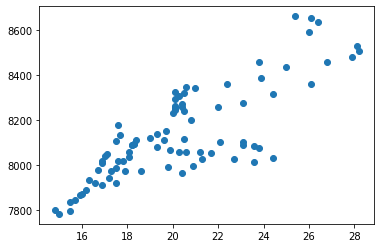

In [206]:
plt.scatter(train_x["Temp"], train_y)

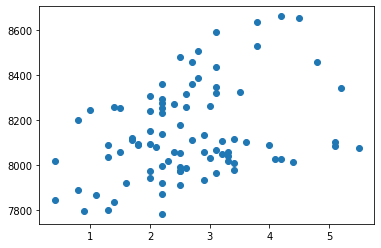

In [207]:
plt.scatter(train_x["Wind"], train_y)

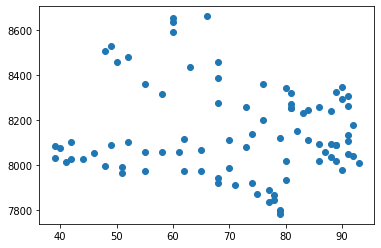

In [208]:
plt.scatter(train_x["Moisture"], train_y)

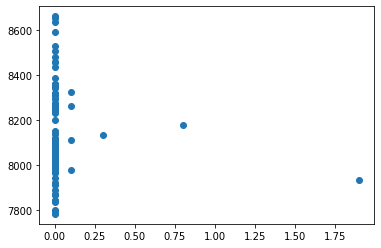

In [209]:
plt.scatter(train_x["Precipitation"], train_y)

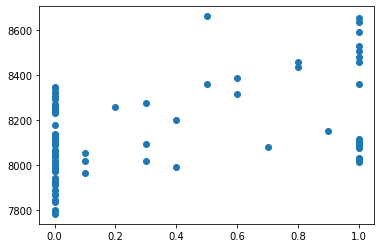

In [210]:
plt.scatter(train_x["Sun"], train_y)

In [211]:
# 각 변수와 Y 사이의 상관계수를 확인합니다.
train_xy = train_x.copy()
train_xy["Y"] = train_y
print(train_xy.corr(method='pearson')["Y"])

Temp             0.803301
Wind             0.349288
Moisture        -0.095042
Precipitation   -0.090389
Sun              0.458348
Y                1.000000
Name: Y, dtype: float64


In [212]:
train_x = train_x.drop(["Wind","Moisture","Precipitation","Sun"], axis=1)

In [213]:
train_x

,Temp
0,17.6
1,17.7
2,17.5
3,17.1
4,17.0
...,...
83,23.9
84,25.0
85,26.0
86,26.4


정답은 없습니다! 

다만 최종 선택한 변수(들)이 왜 선택받았는지 간단히 알려주세요.<br>
답변 : Temp를 선택합니다.<br>
산점도나 상관계수를 봤을 때 Y와 관련이 있는 변수는 Temp 하나로 판단할 수 있습니다.

## 전처리

위에서 선택한 변수들(feature)를 가지고 한번 전력 사용량을 예측하는 모델을 만들어 보기에 앞서,

**train 데이터의 feature의 전처리**를 진행해보려고 합니다. StandardScaler를 사용하셔도 좋고, MinMaxScaler를 사용하셔도 좋습니다! 

또한 PolynomialFeatures를 이용하거나 직접 feature를 계산하여 고차원의 feature를 만드셔도 좋습니다. 이 또한 정답은 없습니다!

이 때 최종 train_x의 shape은 (n_samples, n_features)가 되도록 해주세요.<br>
ex. 4개의 변수를 가진 1000개의 샘플의 경우 train_x.shape은 (1000,4)가 되면 됩니다.

특히 하나의 변수만을 사용하시는 분들은 1D가 아닌 2D가 되도록 신경써주세요<br>
ex. train_x.shape이 (1000,)이 아닌 (1000,1)입니다!

In [214]:
# 사용할 패키지를 import!
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [215]:
preprocessd_data_agg_MinMax = MinMaxScaler().fit_transform(train_x)
train_x = preprocessd_data_agg_MinMax

In [216]:
preprocessd_data_agg_MinMax.shape

(88, 1)

In [217]:
# preprocessd_data_agg_Standard = StandardScaler().fit_transform(train_x)
# preprocessd_data_agg_Standard

In [218]:
# preprocessd_data_agg_Standard.shape

# 모델링

## 학습 

이제 모델링을 해봅시다.

앞서 다룬 여러 regression 모델들(Linear regression, Ridge Regression, Lasso Regression, ..)을 이용해서 fit을 진행해보도록 합시다.

In [219]:
# 사용할 패키지를 import!
from sklearn.linear_model import LinearRegression

In [220]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
# model = 
linreg=LinearRegression()
linreg.fit(train_x,train_y)

LinearRegression()

In [221]:
linear_model = LinearRegression().fit(train_x, train_y)
linear_pred_y = linear_model.predict(train_x)

linear_beta = linear_model.coef_[0]
linear_intercept = linear_model.intercept_
print(f"Beta :{linear_beta: .4f}")
print(f"Intercept : {linear_intercept: .4f}")

Beta : 667.4740
Intercept :  7871.0532


## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [222]:
esti_y = linear_intercept + linear_beta * np.array(train_x)

# np.array가 아니라 list로 받기 위한 과정입니다.
lst = []
for i in range(len(esti_y)):
  lst.append(esti_y[i][0])
esti_y = lst

esti_y

[8010.525431905801,
 8015.506581515556,
 8005.544282296046,
 7985.619683857027,
 7980.638534247272,
 7975.657384637518,
 7965.695085418008,
 7975.657384637518,
 8020.48773112531,
 8095.204975271632,
 8154.978770588688,
 8234.677164344765,
 8284.488660442312,
 8284.488660442312,
 8309.394408491085,
 8319.356707710594,
 8349.243605369124,
 8309.394408491085,
 8264.564062003294,
 8194.827967466726,
 8120.110723320406,
 8060.3369280033485,
 8025.468880735065,
 7990.600833466782,
 7960.713935808253,
 7940.789337369234,
 7925.8458885399705,
 7915.8835893204605,
 7905.921290100951,
 7871.053242832668,
 7881.015542052177,
 7905.921290100951,
 7930.827038149725,
 7975.657384637518,
 7995.581983076537,
 8005.544282296046,
 7945.770486978989,
 8005.544282296046,
 8149.997620978934,
 8174.903369027707,
 8214.752565905745,
 8189.846817856972,
 8159.959920198443,
 8145.016471369179,
 8125.09187293016,
 8110.148424100896,
 8095.204975271632,
 8080.2615264423675,
 8050.3746287838385,
 8045.39347917408

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [223]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [224]:
train_mse = mse(esti_y, train_y)
print(f"Linear {train_mse:.5f}")

Linear 14543.75828


In [225]:
def visualize(model, x, y):
    if x.shape[1] != 1:
        return None
    beta = model.coef_[0]
    intercept = model.intercept_
    
    x_axis = np.linspace(np.min(x), np.max(x), 100)
    fit = intercept * x_axis**0 + beta*x_axis 

    plt.figure(figsize=(8,6))
    plt.plot(x_axis, fit, label='Predict', c='r', linewidth=3)
    plt.scatter(x, y, c='blue')
    plt.legend()
    plt.show()

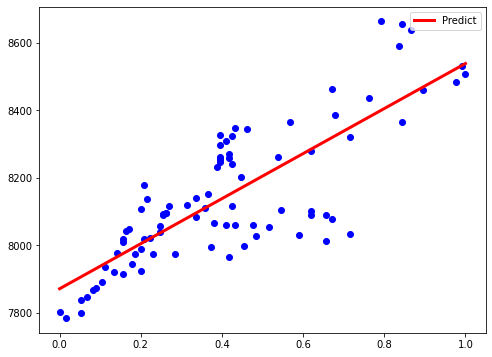

In [226]:
# visualization 하실 분은 진행해주세요!
visualize(linreg, train_x, train_y)

# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [227]:
# transform을 하시는 분들은 실행해주세요
test_x = test_x.drop(["Wind","Moisture","Precipitation","Sun"], axis=1)

In [228]:
test_x = MinMaxScaler().fit_transform(test_x)

# y1_hat에 predict값 할당
pred_y = linear_intercept + linear_beta * np.array(test_x)

# np.array가 아니라 list로 받기 위한 과정입니다.
lst = []
for i in range(len(pred_y)):
  lst.append(pred_y[i][0])
pred_y = lst

pred_y

[8538.527290539803,
 8391.683000044233,
 8338.285076227663,
 8191.440785732093,
 8151.392342869665,
 8071.295457144809,
 8004.548052374095,
 7951.150128557524,
 7924.451166649238,
 7897.752204740953,
 7871.053242832668,
 7871.053242832668]

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [229]:
def score(train_mse, test_mse):
    print(f"{test_mse/train_mse: .4f}")

In [230]:
test_mse = mse(pred_y, test_y)
print(f"Linear {test_mse:.5f}")

Linear 307026.09931


In [231]:
score(train_mse,test_mse)

 21.1105


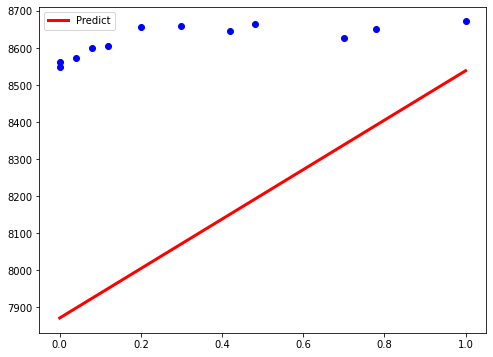

In [232]:
# visualization 하실 분은 진행해주세요!
visualize(linreg, test_x, test_y)

# 그 이후

이제 여러분들은 한번 모델을 만들어보고 fitting한 다음 예측까지 해보셨습니다.

이제 개선하기 위해 1.데이터부터 5.성능평가 중 수정, 변경하실 부분을 업데이트 해서  최적의 모델을 찾아보세요!

현재 사용하고 있는 scaler, model부터 전처리과정 기타 여러 조건을 조작해보시고 어떤 효과가 있는지 한번 보시고 알려주세요:D

고생하셨습니다!